Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import scipy
from scipy.stats import zscore


Load the dataset

In [2]:
df = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/transactions.csv")
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


Step 1: Data quality checks (missing values, duplicates, outliers)

In [3]:
#check basic info
df.info()
#1. check for missing values
missing_values = df.isnull().sum().sort_values
print(missing_values)
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

I want to know the distinct values and thier counts in the 'acqCountry' column to decide how to handle the missing: 3913 value

In [4]:
acqCountry_valueCounts = df["acqCountry"].value_counts(dropna=False)
print(acqCountry_valueCounts)

merchantCountryCode_valueCounts = df["merchantCountryCode"].value_counts(dropna=False)  
print(merchantCountryCode_valueCounts)

posEntryMode_valueCounts = df["posEntryMode"].value_counts(dropna=False)    
print(posEntryMode_valueCounts)

postConditionCode_valueCounts = df["posConditionCode"].value_counts(dropna=False)   
print(postConditionCode_valueCounts)

transactionType_valueCounts = df["transactionType"].value_counts(dropna=False)    
print(transactionType_valueCounts)

cardCVV_valueCounts = df["cardCVV"].value_counts(dropna=False)
print(cardCVV_valueCounts)

enteredCVV_valueCounts = df["enteredCVV"].value_counts(dropna=False)
print(enteredCVV_valueCounts)

creditLimit_valueCounts = df["creditLimit"].value_counts(dropna=False)
print(creditLimit_valueCounts)

acqCountry
US     632303
NaN      3913
MEX      2626
CAN      1870
PR       1202
Name: count, dtype: int64
merchantCountryCode
US     635577
MEX      2636
CAN      1874
PR       1203
NaN       624
Name: count, dtype: int64
posEntryMode
5.0     255615
9.0     193193
2.0     160589
90.0     16251
80.0     12921
NaN       3345
Name: count, dtype: int64
posConditionCode
1.0     514144
8.0     121507
99.0      5976
NaN        287
Name: count, dtype: int64
transactionType
PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
NaN                        589
Name: count, dtype: int64
cardCVV
633    11354
746     8886
625     7626
312     6583
986     6464
       ...  
384       61
981       55
500       49
199       37
862       19
Name: count, Length: 899, dtype: int64
enteredCVV
633    11254
746     8816
625     7559
312     6524
986     6399
       ...  
4          1
30         1
78         1
55         1
81         1
Name: count, Length: 980, dtype: in

In [5]:
#Handling missing values
#for categorical columns using mode for imputation
df['acqCountry'] = df['acqCountry'].fillna(df['acqCountry'].mode()[0])
df['merchantCategoryCode']= df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0])
df['posEntryMode']= df['posEntryMode'].fillna(df['posEntryMode'].mode()[0])
df['posConditionCode']= df['posConditionCode'].fillna(df['posConditionCode'].mode()[0])
df['transactionType']= df['transactionType'].fillna(df['transactionType'].mode()[0])

df.isnull().sum().sort_values

<bound method Series.sort_values of accountNumber                 0
customerId                    0
creditLimit                   0
availableMoney                0
transactionDateTime           0
transactionAmount             0
merchantName                  0
acqCountry                    0
merchantCountryCode         624
posEntryMode                  0
posConditionCode              0
merchantCategoryCode          0
currentExpDate                0
accountOpenDate               0
dateOfLastAddressChange       0
cardCVV                       0
enteredCVV                    0
cardLast4Digits               0
transactionType               0
isFraud                       0
currentBalance                0
cardPresent                   0
expirationDateKeyInMatch      0
dtype: int64>

In [6]:
#2. Check fo duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


check for outliers
columns we will check: creditlimit, availableMoney, transactionAmount, currentBalance

Checking if the data is normally distributed or not before checking for outliers

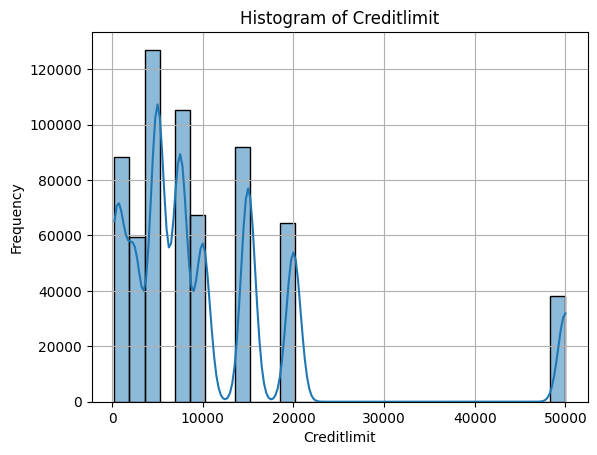

In [9]:
#Histogram
sns.histplot(df['creditLimit'],kde=True, bins=30)
plt.title('Histogram of Creditlimit')
plt.xlabel('Creditlimit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


So creditlimit is positively skewed (right skewed): peak on the left, tail stretching to the right

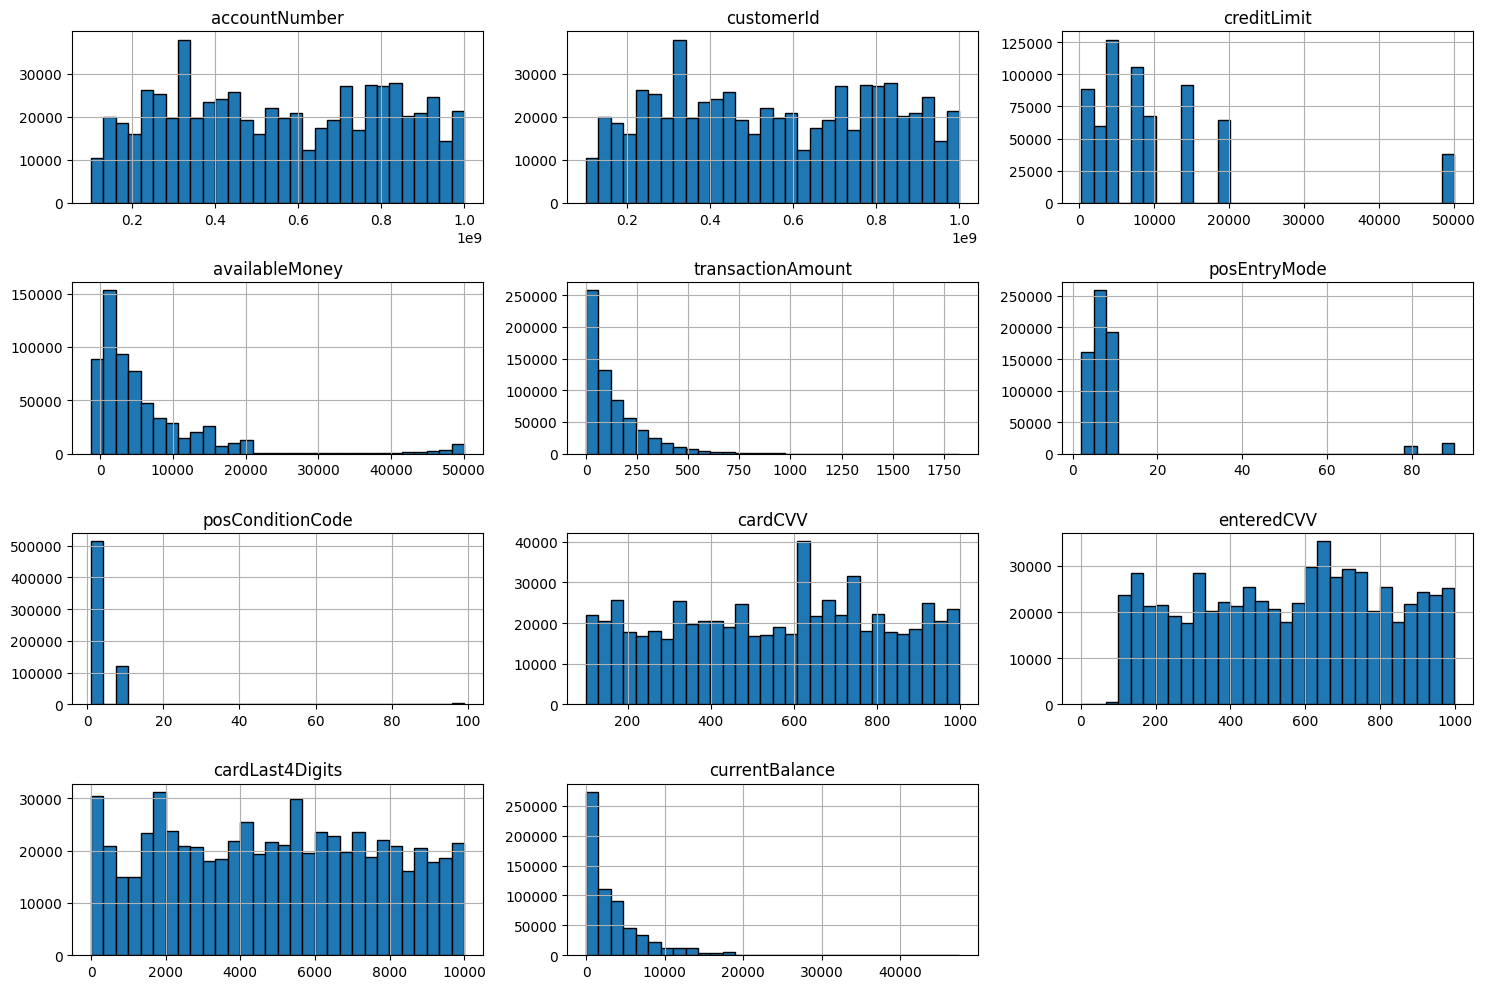

In [10]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Similarly, availableMoney, transactionAmount, currentBalance are also positively skewed . So for outlier detecting using IQR or MAD is more appropriate that Z-score.
IQR = Q3 - Q1
A data point is considered an outlier if it falls below
Q1-1.5* IQR 
or above
Q3 + 1.5* IQR

In [18]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    return (df[column] < lower_bound) | (df[column] > upper_bound)

#making a copy that contains outlier columsn
df_outliers_flagged = df.copy()

#for credit limit
df_outliers_flagged['outliers_creditLimit'] = detect_outliers_iqr(df, 'creditLimit')
#for avaiableMoney
df_outliers_flagged['outliers_availableMoney'] = detect_outliers_iqr(df, 'availableMoney')
#for transactionAmount
df_outliers_flagged['outliers_transactionAmount'] = detect_outliers_iqr(df, 'transactionAmount')
#for currentBalance
df_outliers_flagged['outliers_currentBalance'] = detect_outliers_iqr(df, 'currentBalance')

#single column
df_outliers_flagged['is_outlier_any']= (
    df_outliers_flagged['outliers_creditLimit'].notna() |
    df_outliers_flagged['outliers_availableMoney'].notna() |
    df_outliers_flagged['outliers_transactionAmount'].notna() |
    df_outliers_flagged['outliers_currentBalance'].notna())

outliers_combined = df_outliers_flagged[df_outliers_flagged['is_outlier_any'] == True]

# Show result
print(outliers_combined.head())


   accountNumber  customerId  creditLimit  availableMoney  \
0      733493772   733493772         5000         5000.00   
1      733493772   733493772         5000         4888.67   
2      733493772   733493772         5000         4863.92   
3      733493772   733493772         5000         4676.52   
4      733493772   733493772         5000         4449.18   

   transactionDateTime  transactionAmount merchantName acqCountry  \
0  2016-01-08T19:04:50             111.33         Lyft         US   
1  2016-01-09T22:32:39              24.75         Uber         US   
2  2016-01-11T13:36:55             187.40         Lyft         US   
3  2016-01-11T22:47:46             227.34         Lyft         US   
4  2016-01-16T01:41:11               0.00         Lyft         US   

  merchantCountryCode  posEntryMode  ...       transactionType isFraud  \
0                  US           5.0  ...              PURCHASE    True   
1                  US           9.0  ...              PURCHASE   False

Outliers in creditLimit: 38039
Outliers in availableMoney: 44952
Outliers in transactionAmount: 33506
Outliers in currentBalance: 48233

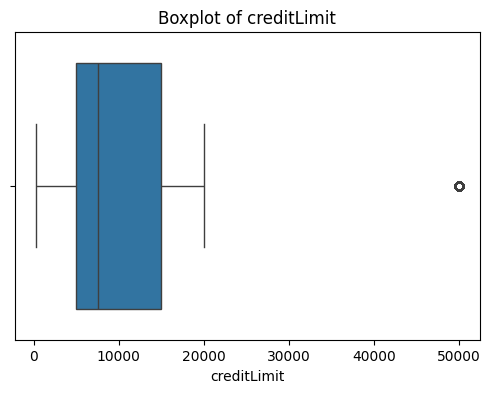

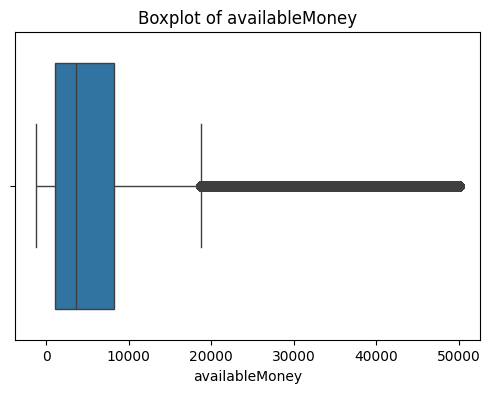

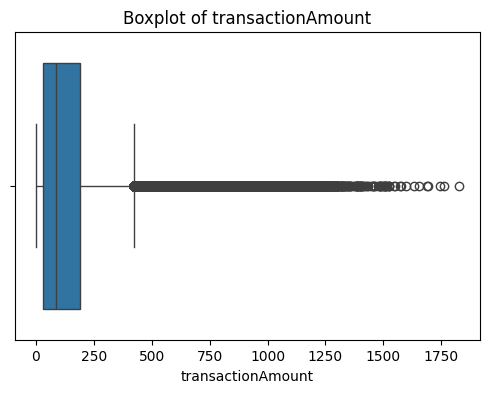

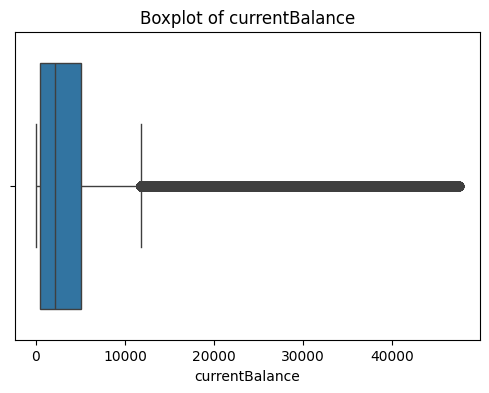

In [ ]:
#visualzing outliers

# Boxplot for all four columns
cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
